In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression

%config InlineBackend.figure_format = 'retina'


plt.style.context('fivethirtyeight')
# 

In [20]:
import matplotlib
import numpy as np

X_LABEL = "X_LABEL"
Y_LABEL = "Y_LABEL"
LOG_SCALE = "LOG_SCALE"

def get_data_sorted(name, data):
    """
    Takes the dataset and the name of column on which it sorts
    return python, matlab dataset
    """
    data = data.sort_values(by=[name])  # sort sulle dimensioni delle matrici in ordine crescente
    data_python = data.loc[data['Language'] == 1]
    data_matlab = data.loc[data['Language'] == 0]
    return data_python, data_matlab


def read_data(name):
    from Analysis.resources.costants import RESOURCES_DIRECTORY
    path = os.path.join(RESOURCES_DIRECTORY, name)
    return pd.read_csv(path)


def write_data(df, name):
    from Analysis.resources.costants import RESOURCES_DIRECTORY
    path = os.path.join(RESOURCES_DIRECTORY, name)
    df.to_csv(path, index=False)

def plot(labels, data_py, data_matlab, x_name, y_name, title, **keywords):

    figure(figsize=(20, 6), dpi=80)
    title = title + " " + "(Line Plot)"

    plt.plot(labels, data_py, label="Python", linestyle="-")
    plt.plot(labels, data_matlab, label="Matlab", linestyle="--")
    show(x_name, y_name, title, **keywords)


def bar_plot(labels, data_py, data_matlab, x_name, y_name, title, **keywords):
    figure(figsize=(20, 6), dpi=80)
    title = title + " " + "(Bar Plot)"

    x_axis = np.arange(len(labels))

    # Multi bar Chart

    plt.bar(x_axis -0.2, data_py, width=0.4, label = 'Python')
    plt.bar(x_axis +0.2, data_matlab, width=0.4, label = 'Matlab')

    # Xticks

    plt.xticks(x_axis, labels)
    show(x_name, y_name, title, **keywords)



def show(x_name, y_name, title, **keywords):

    x_label, y_label = "", ""
    if X_LABEL in keywords.keys():
        x_label = f"({keywords[X_LABEL]})"
    if Y_LABEL in keywords.keys():
        y_label = f"({keywords[Y_LABEL]})"
    if LOG_SCALE in keywords.keys():
        plt.yscale('log') # logarithmic scale

    plt.xlabel(f"{x_name} {x_label}",  labelpad=15, fontsize=12, color="#333533")
    plt.ylabel(f"{y_name} {y_label}",  labelpad=15, fontsize=12, color="#333533")
    plt.title(title, fontsize=18, color="#333533", pad=35)

    # removing axes from the figure
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.legend(loc='upper center',ncol=2,frameon=False)
    plt.show()


def correlation(x, y, x_name, y_name):
    figure(figsize=(20, 6), dpi=80)
    title = f"Scatter-plot variables '{x_name}' and '{y_name}'"
    my_rho = np.corrcoef(x, y) # Correlation Coefficient
    print(my_rho)

    plt.xscale('log')
    plt.scatter(x, y)
    plt.plot(x, y, color = "g")
    show(x_name, y_name, title)



In [ ]:
data = read_data("data.csv")
data

# Windows

Innanzitutto prendo in considerazione solo le righe che hanno come OS Windows

In [ ]:
windowsDataset = data.loc[data['OS'] == 0]
windowsDataset

,Name,Rows,Columns,Error,Memory,Time,Language,OS,Nnz,Cond
0,apache2,715176,715176,2.235941e-08,0.004471,66.232192,1,0,4817870,5.316861e+06
1,apache2,715176,715176,4.388900e-11,2877.018100,13.430700,0,0,4817870,5.316861e+06
4,cfd1,70656,70656,6.628463e-12,0.003326,4.461982,1,0,1825580,1.335081e+06
5,cfd1,70656,70656,1.135900e-13,577.585200,2.557600,0,0,1825580,1.335081e+06
8,cfd2,123440,123440,1.334161e-10,0.003326,10.917099,1,0,3085406,3.728473e+06
9,cfd2,123440,123440,3.348600e-13,1187.708900,6.083400,0,0,3085406,3.728473e+06
12,ex15,6867,6867,5.281170e-05,0.003326,0.015078,1,0,98671,1.432642e+13
13,ex15,6867,6867,6.348200e-07,3.616800,0.030822,0,0,98671,1.432642e+13
16,G3_circuit,1585478,1585478,3.452568e-09,210.620559,27.939265,1,0,7660826,2.238425e+07
17,G3_circuit,1585478,1585478,3.576600e-12,3262.529500,19.503700,0,0,7660826,2.238425e+07


In [ ]:
windows_py, windows_mat = get_data_sorted("Rows", windowsDataset)

In [ ]:
windows_py

,Name,Rows,Columns,Error,Memory,Time,Language,OS,Nnz,Cond
12,ex15,6867,6867,5.281170e-05,0.003326,0.015078,1,0,98671,1.432642e+13
4,cfd1,70656,70656,6.628463e-12,0.003326,4.461982,1,0,1825580,1.335081e+06
24,shallow_water1,81920,81920,6.923992e-14,9.067514,0.615064,1,0,327680,3.628000e+00
8,cfd2,123440,123440,1.334161e-10,0.003326,10.917099,1,0,3085406,3.728473e+06
20,parabolic_fem,525825,525825,8.836779e-10,0.003326,6.439602,1,0,3674625,2.110820e+05
0,apache2,715176,715176,2.235941e-08,0.004471,66.232192,1,0,4817870,5.316861e+06
16,G3_circuit,1585478,1585478,3.452568e-09,210.620559,27.939265,1,0,7660826,2.238425e+07


### Error

In [ ]:
plot(windows_py['Name'], windows_py['Error'], windows_mat['Error'], "Name", "Error", "Error Analysis on Windows", LOG_SCALE=True)


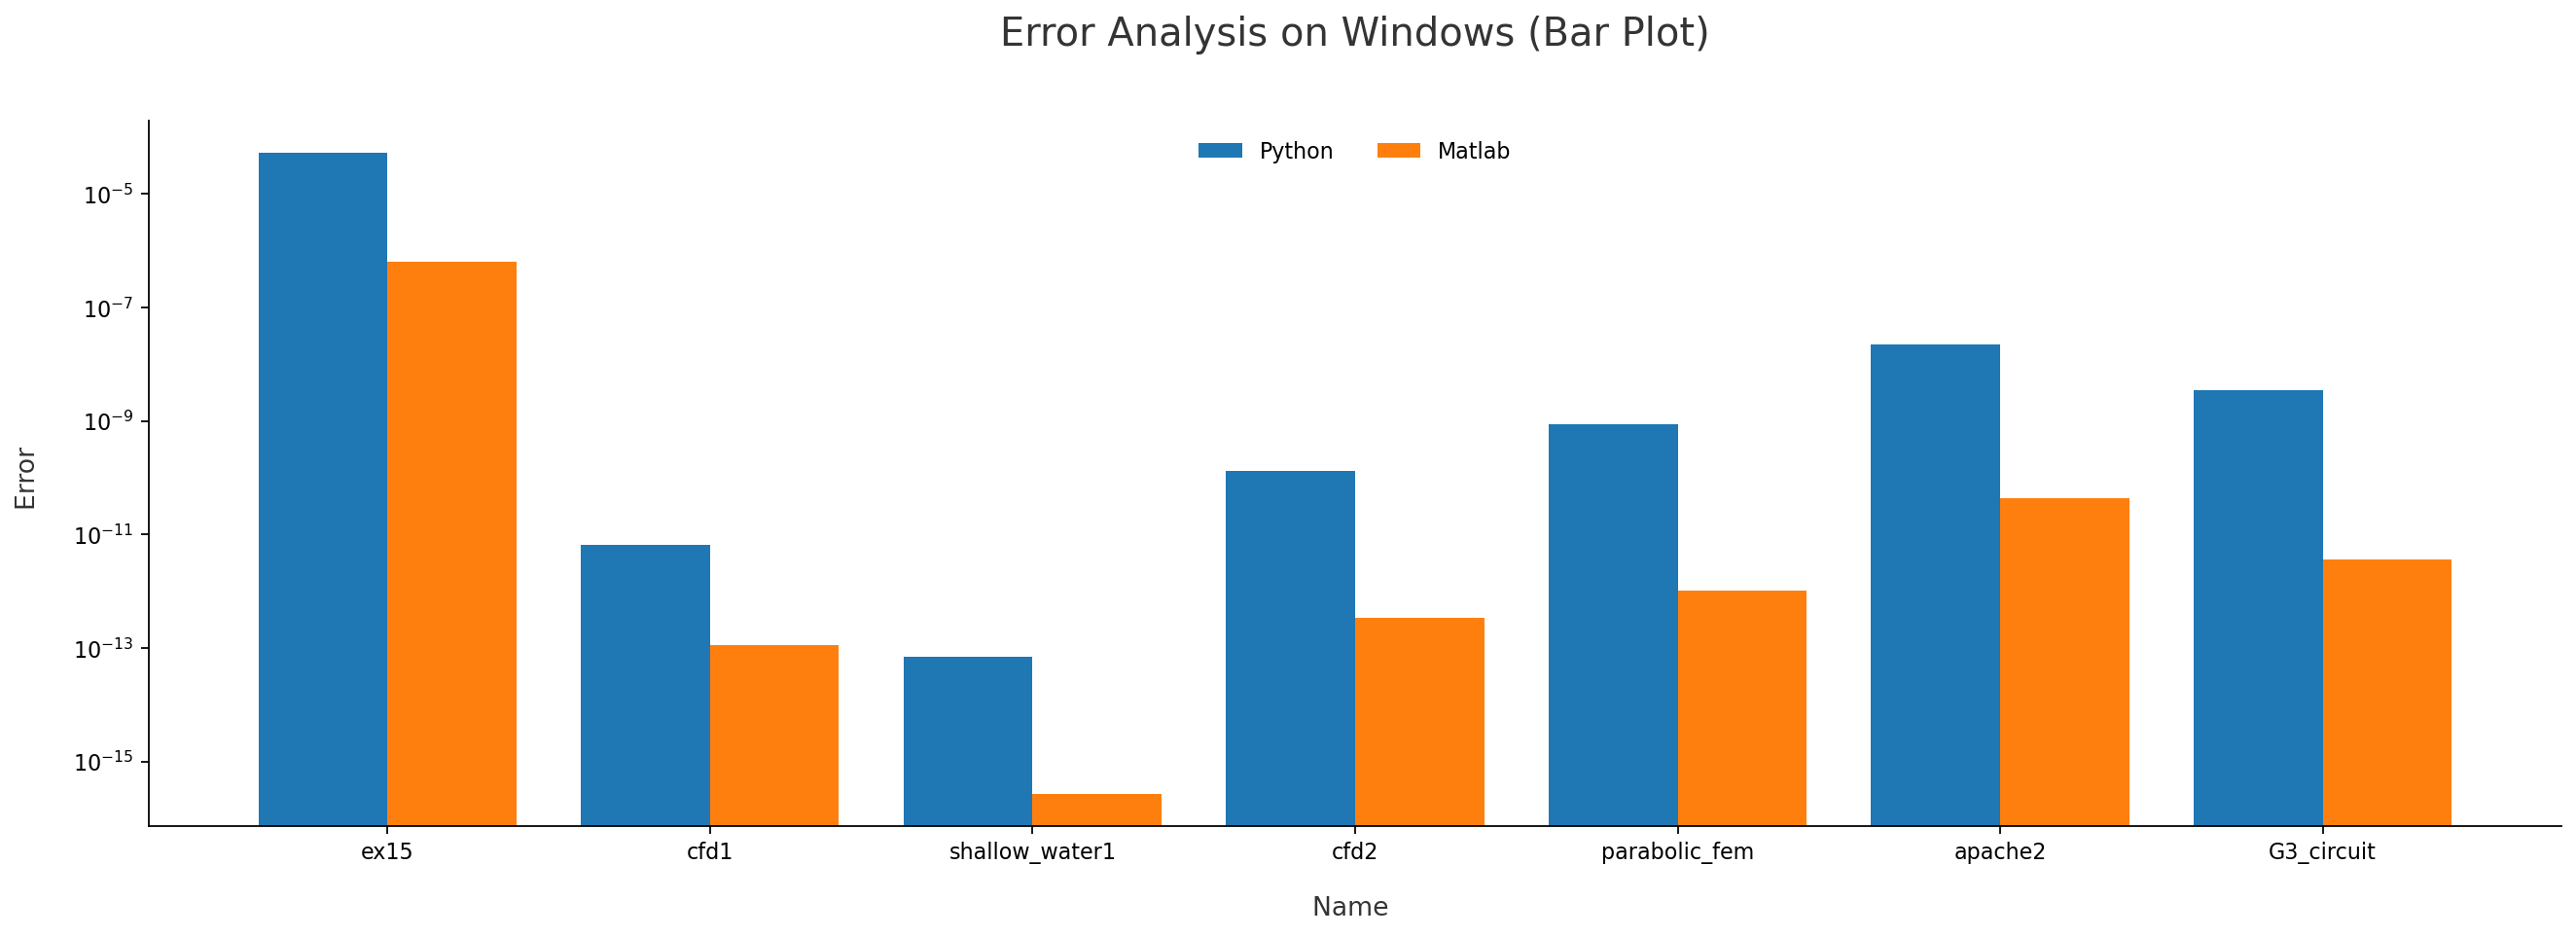

In [ ]:
bar_plot(windows_py['Name'], windows_py['Error'], windows_mat['Error'], "Name", "Error", "Error Analysis on Windows", , LOG_SCALE=True)


### Memory

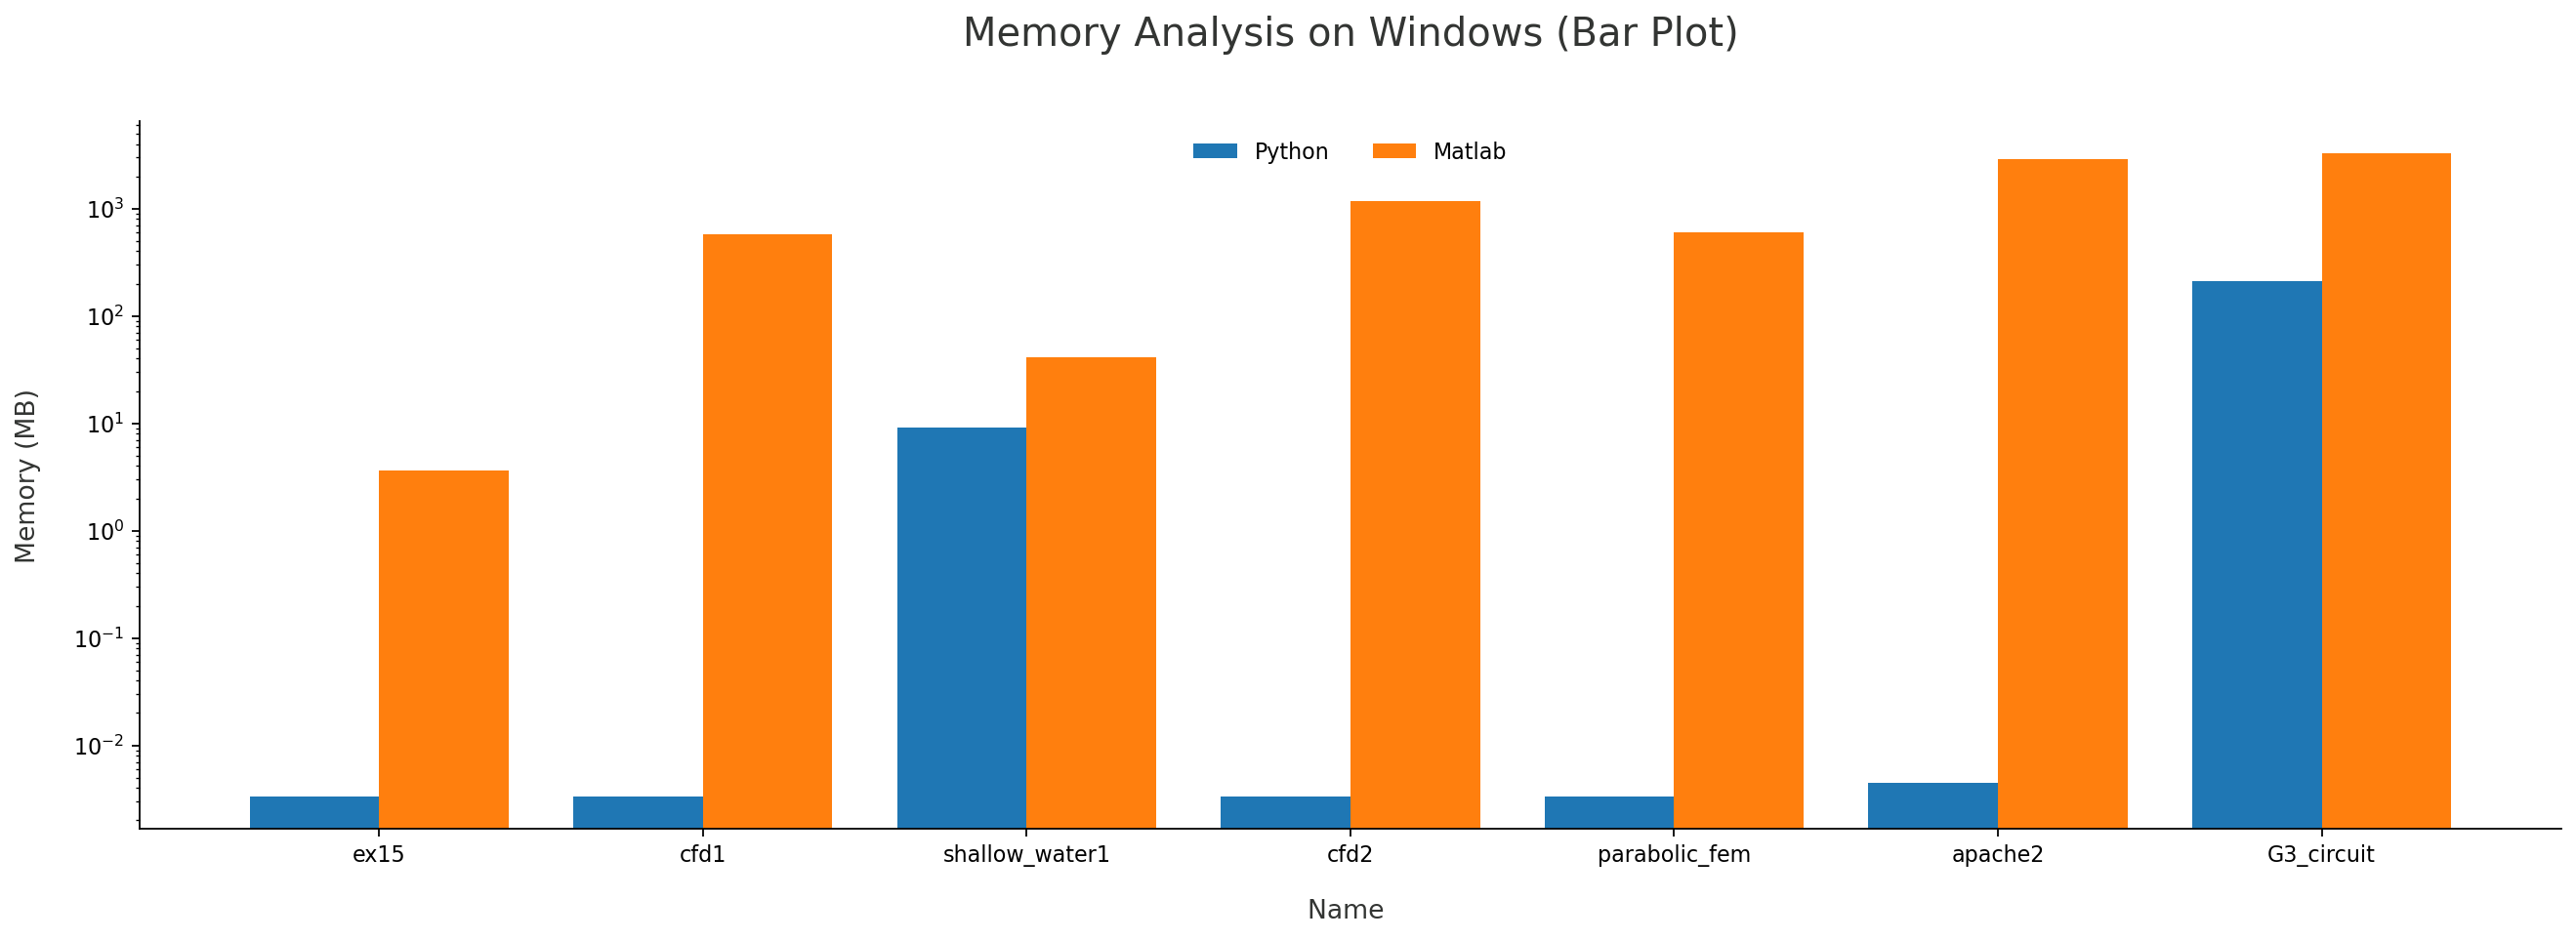

In [ ]:
bar_plot(windows_py['Name'], windows_py['Memory'], windows_mat['Memory'], "Name", "Memory", "Memory Analysis on Windows", Y_LABEL="MB")

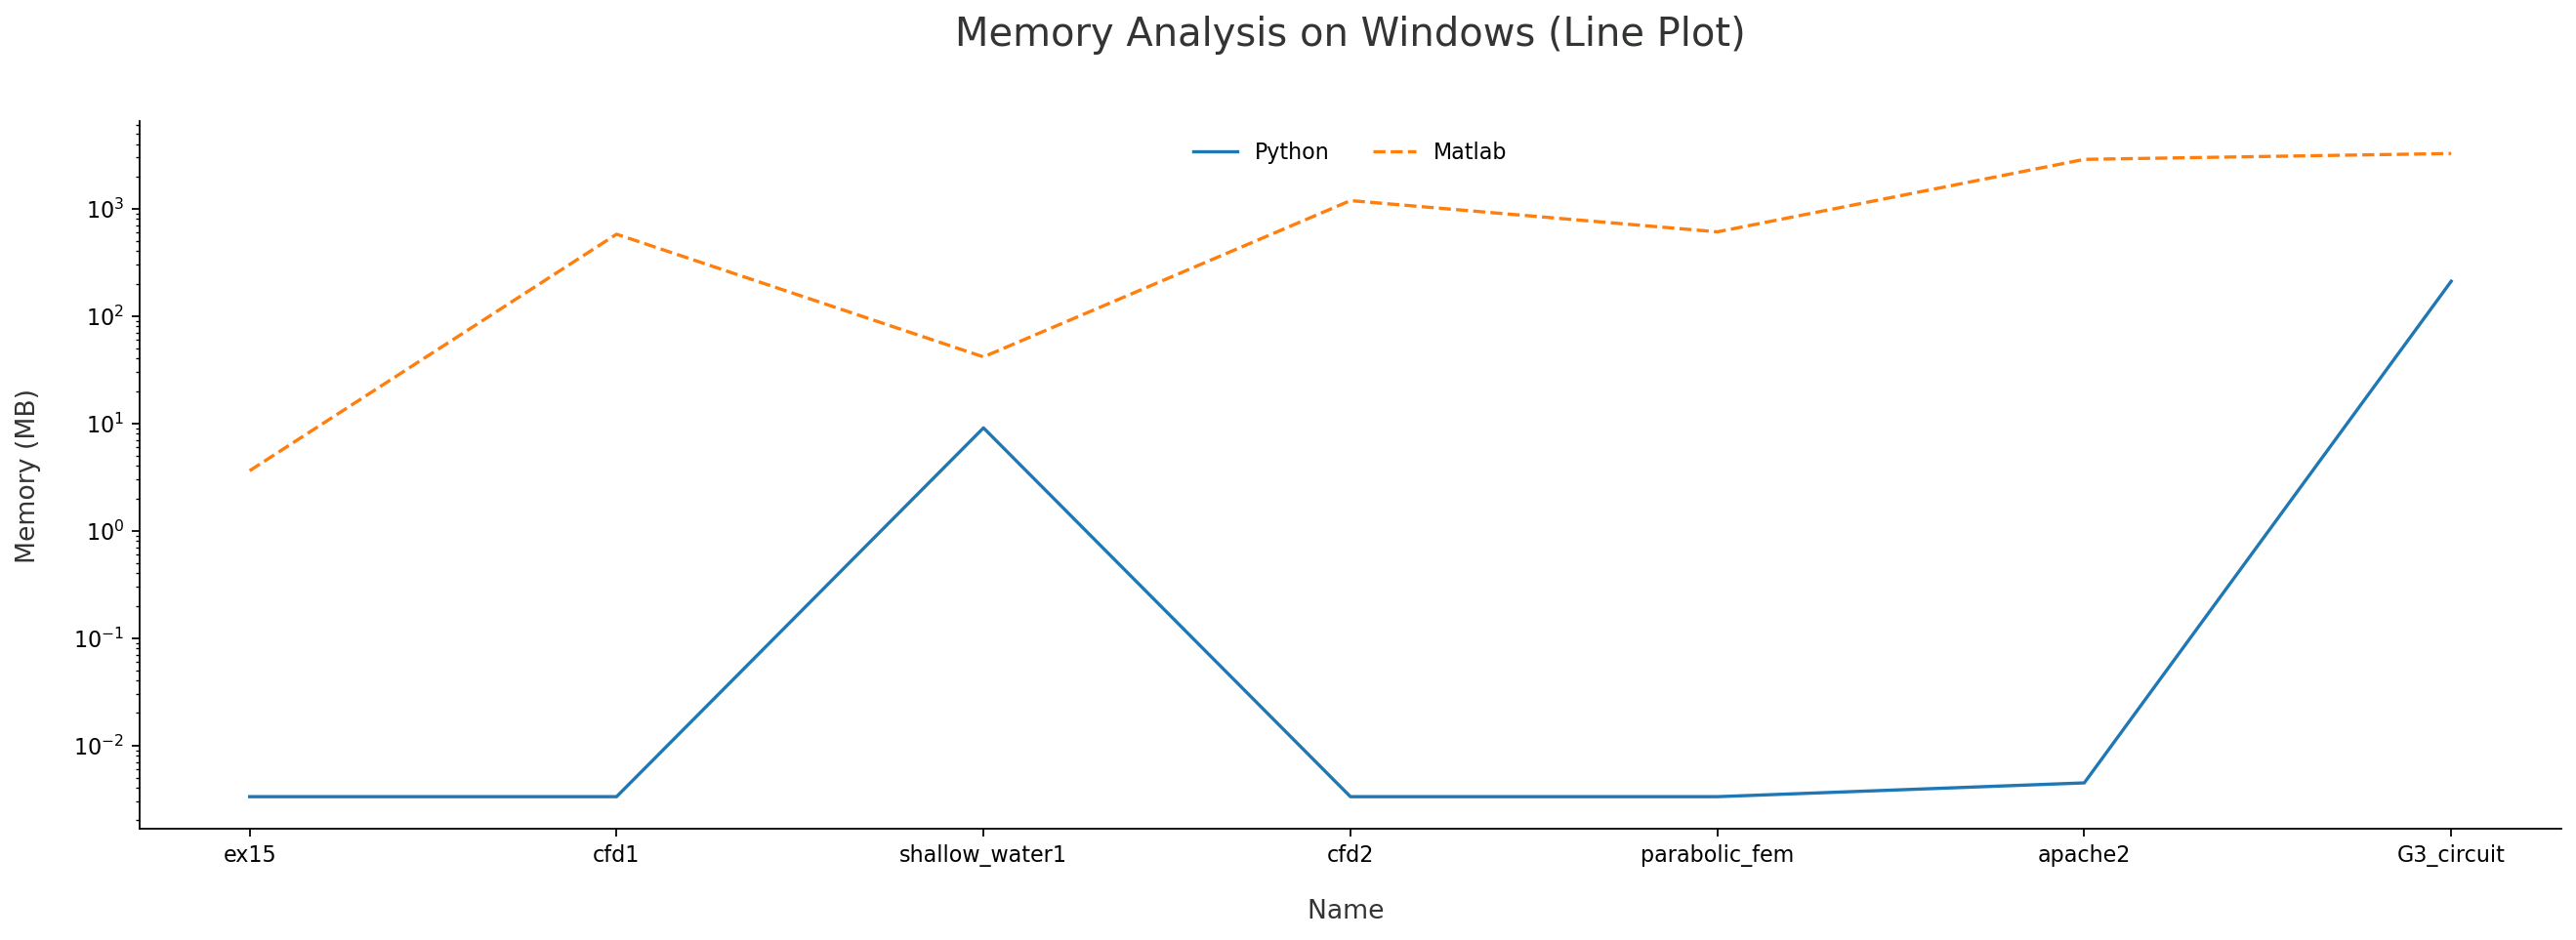

In [ ]:
plot(windows_py['Name'], windows_py['Memory'], windows_mat['Memory'], "Name", "Memory", "Memory Analysis on Windows", Y_LABEL="MB")

### Time

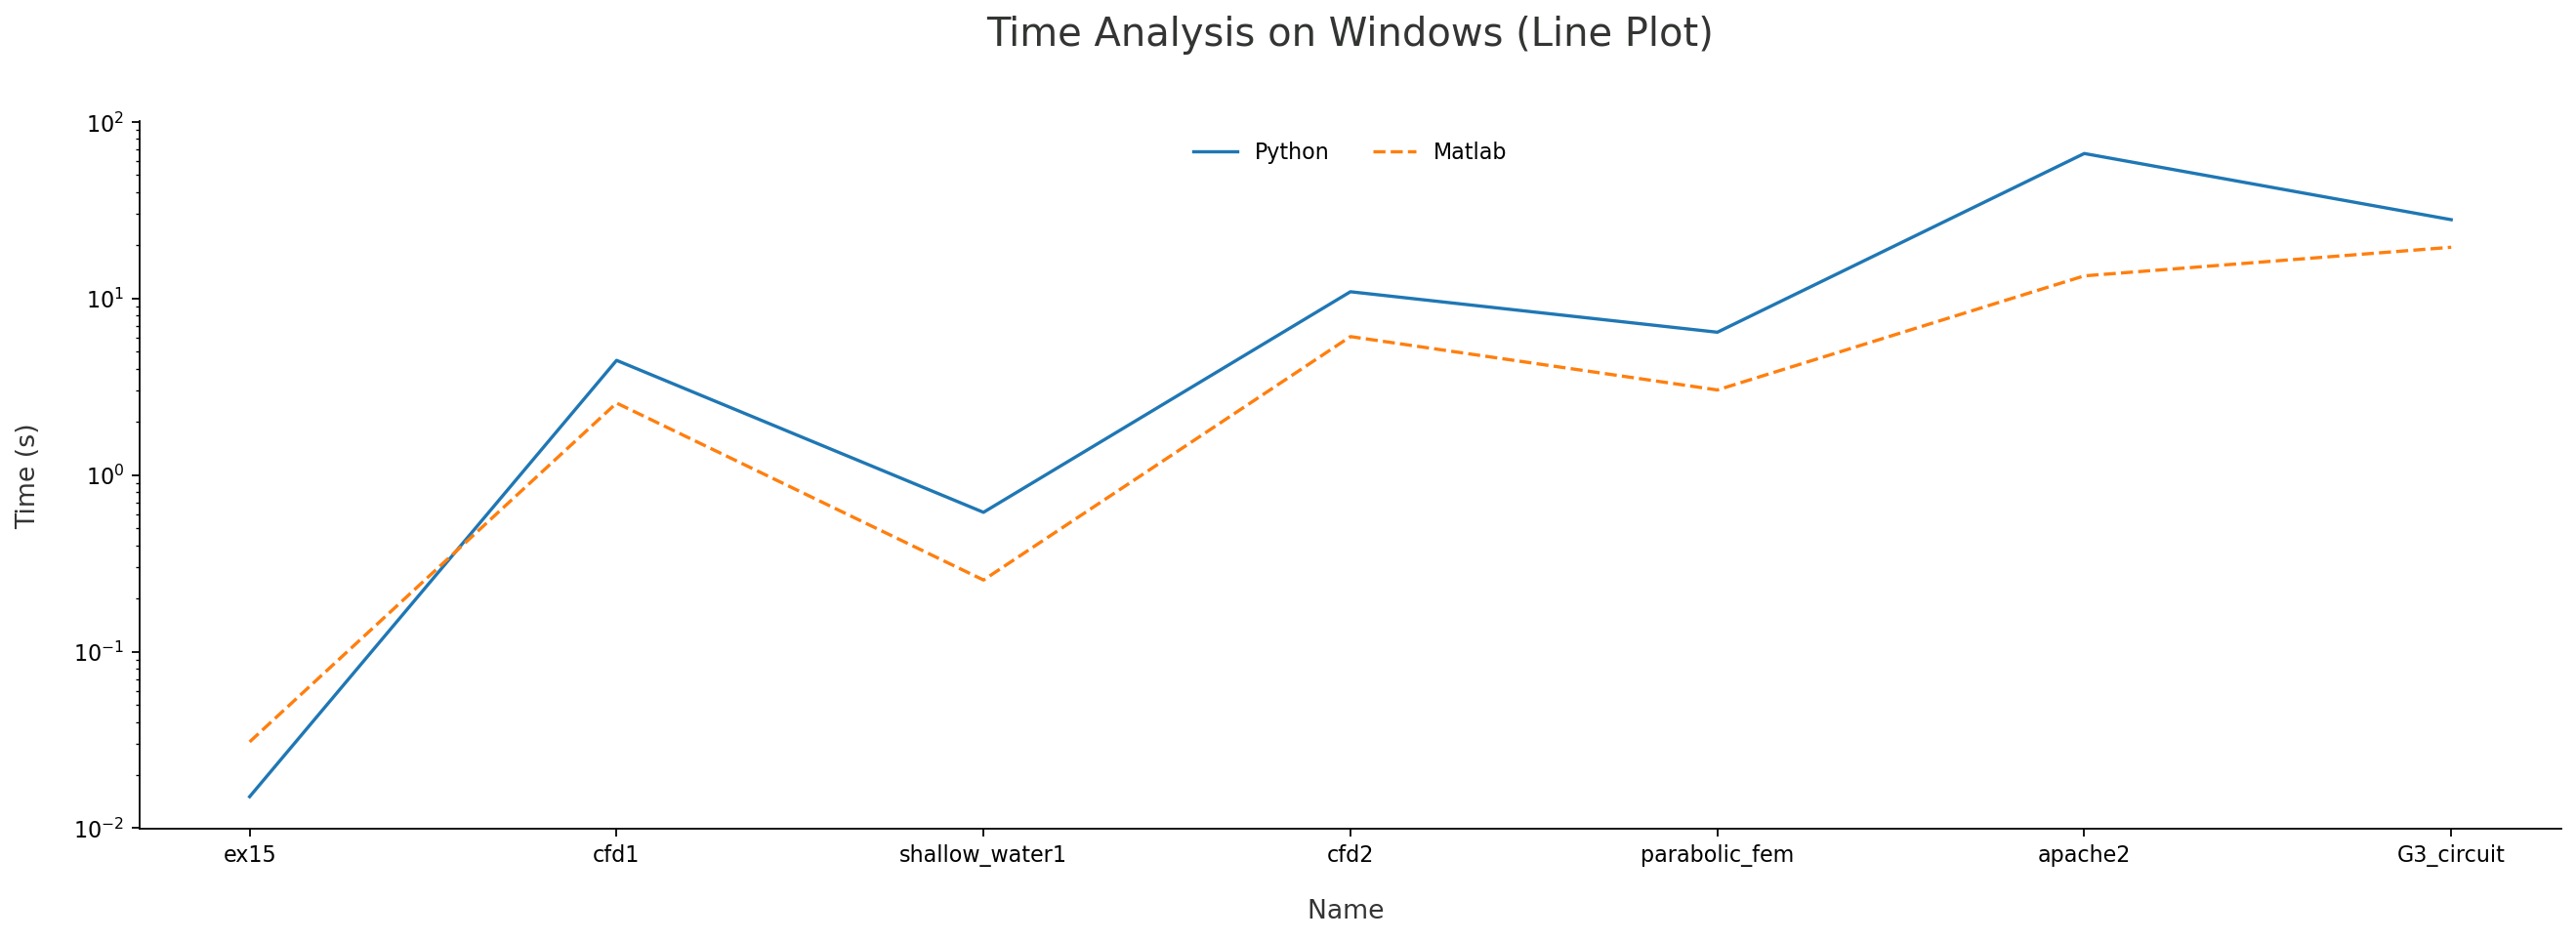

In [ ]:
plot(windows_py['Name'], windows_py['Time'], windows_mat['Time'], "Name", "Time","Time Analysis on Windows", Y_LABEL="s")

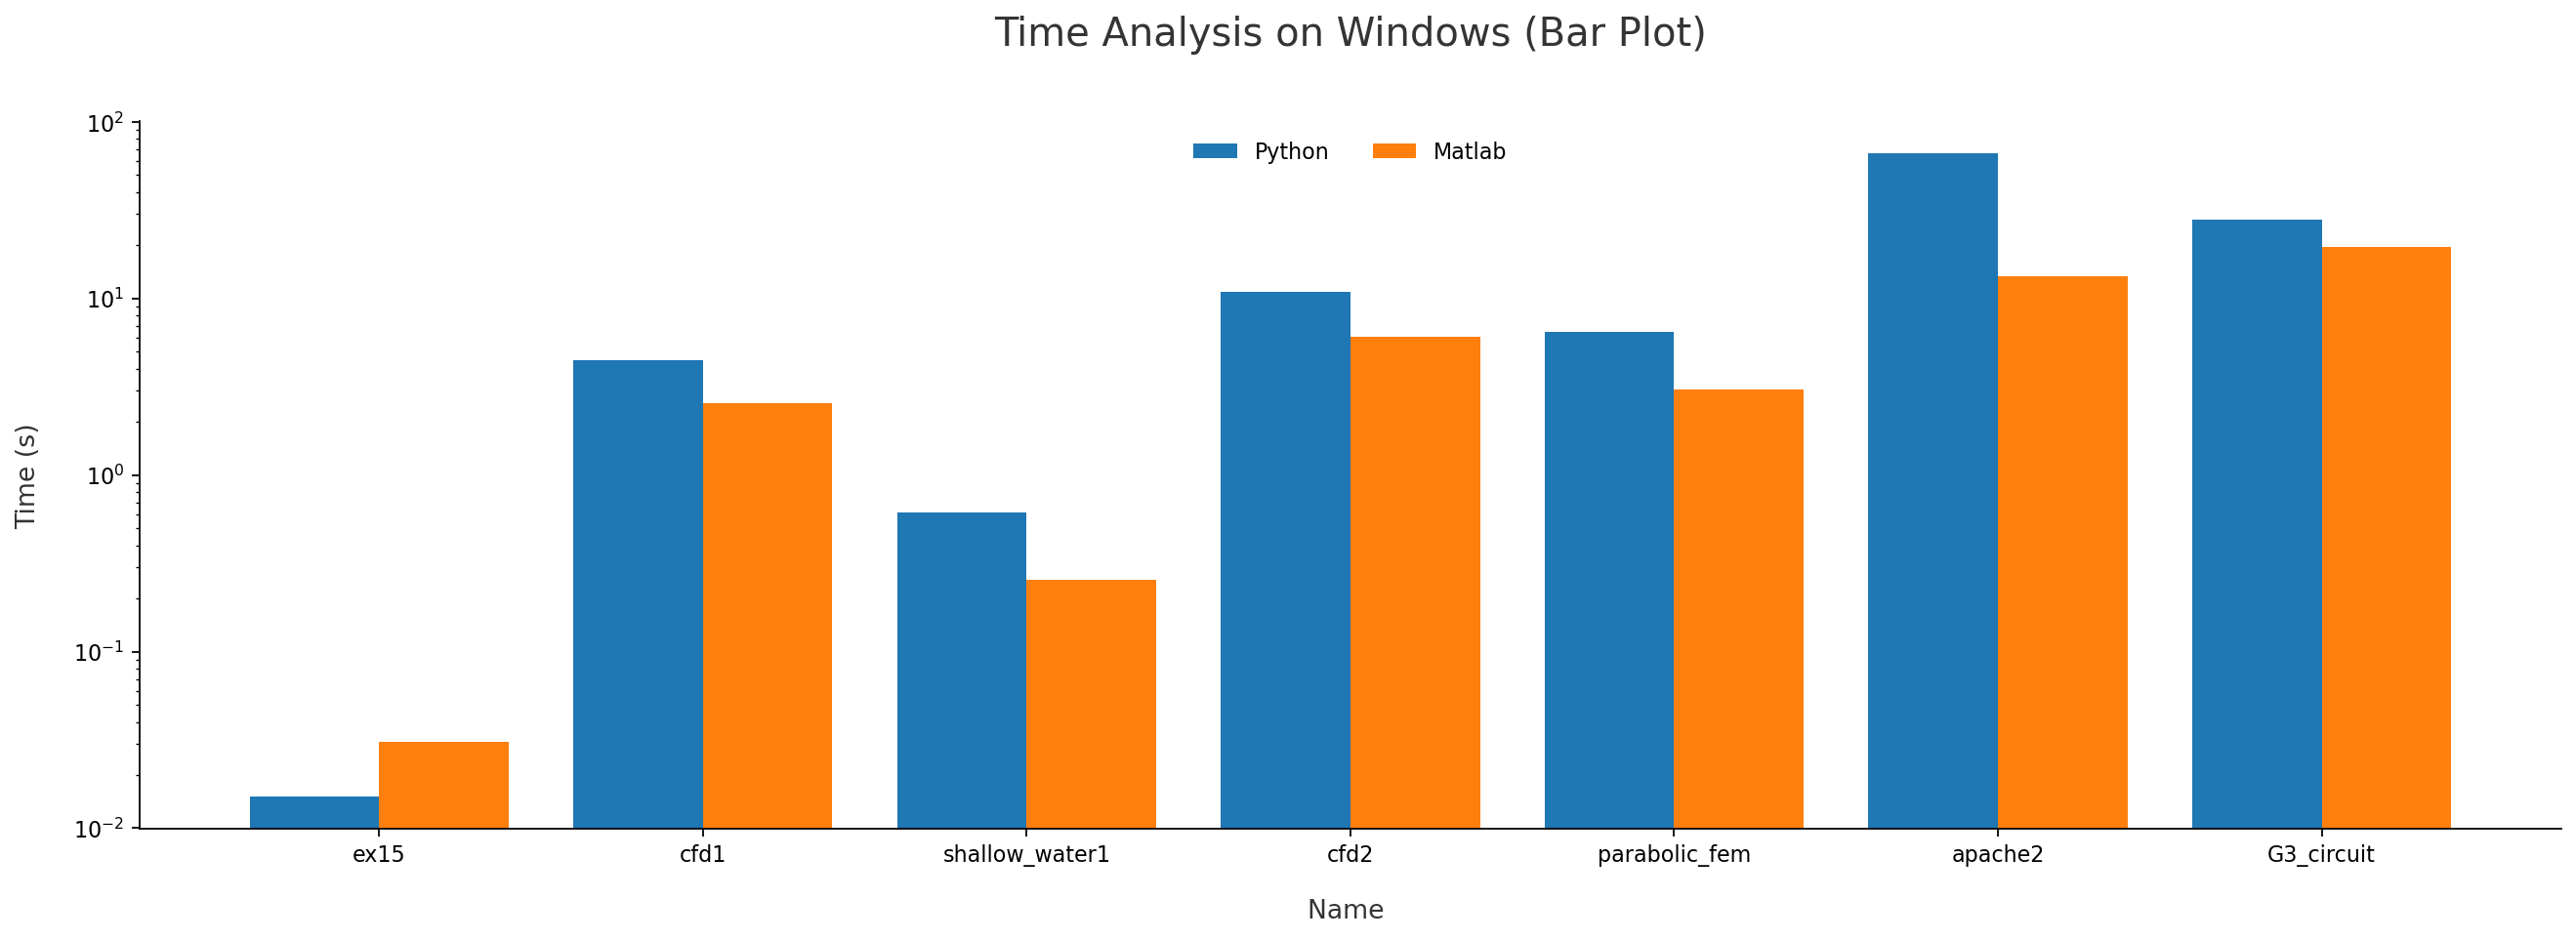

In [ ]:
bar_plot(windows_py['Name'], windows_py['Time'], windows_mat['Time'], "Name", "Time","Time Analysis on Windows", Y_LABEL="s")

## ANALISI SUCCESSIVE

### Condizionamento e Errore
Calcoliamo la regressione lineare tra le due variabli

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[1.         0.99999992]
 [0.99999992 1.        ]]


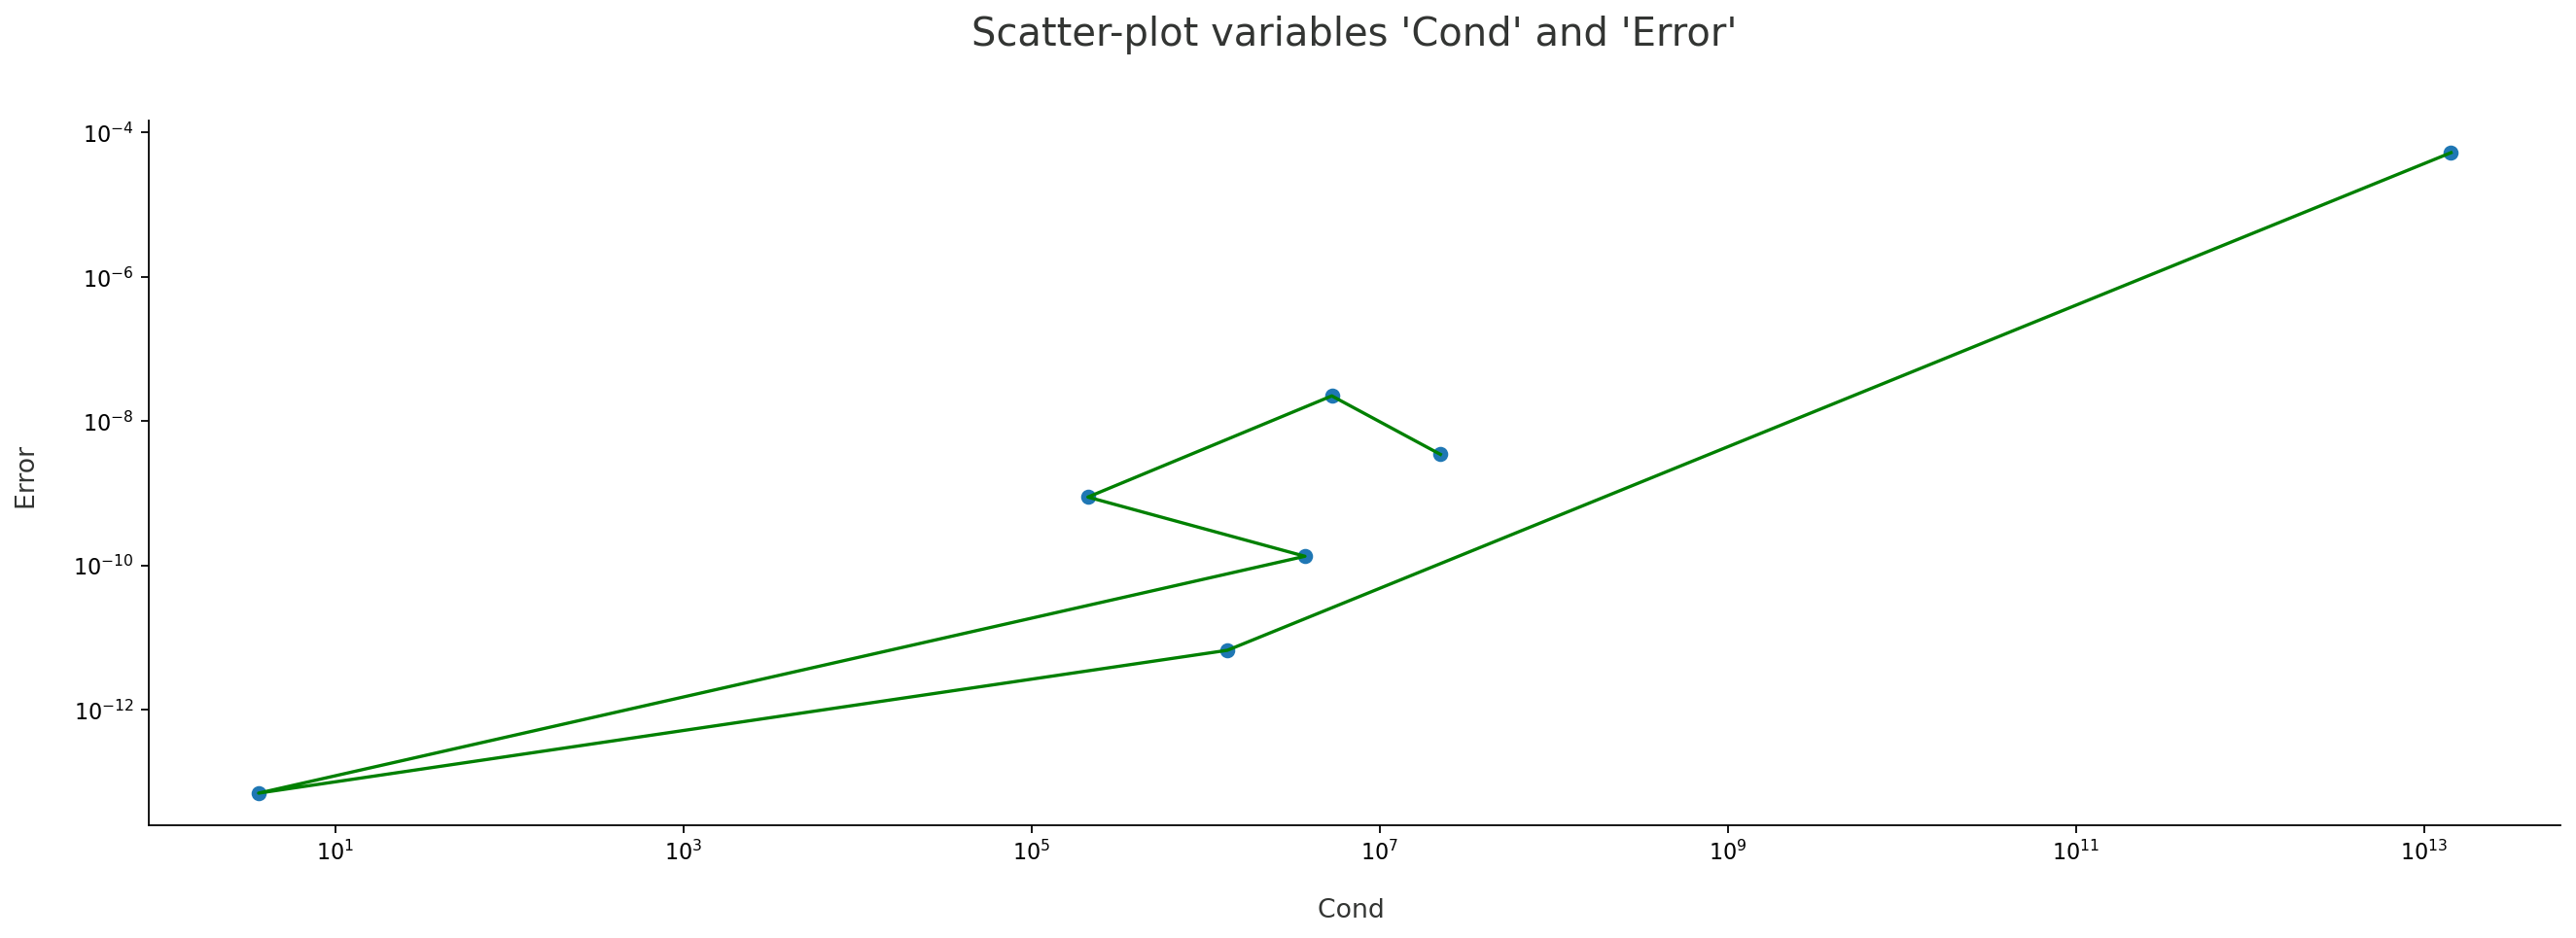

In [ ]:
x = np.array(windows_py['Cond'])
y = np.array(windows_py['Error'])

correlation(x, y, "Cond", "Error")

[[1.         0.99999992]
 [0.99999992 1.        ]]

Correlazione forte

# LINUX

In [ ]:
linuxDataset = data.loc[data['OS'] == 1]
linuxDataset

,Name,Rows,Columns,Error,Memory,Time,Language,OS,Nnz,Cond
2,apache2,715176,715176,2.235941e-08,131.386811,83.372801,1,1,4817870,5.316861e+06
3,apache2,715176,715176,4.388900e-11,2769.992000,15.145300,0,1,4817870,5.316861e+06
6,cfd1,70656,70656,6.628463e-12,49.466571,5.382657,1,1,1825580,1.335081e+06
7,cfd1,70656,70656,1.135900e-13,560.592000,2.723700,0,1,1825580,1.335081e+06
10,cfd2,123440,123440,1.334161e-10,0.003326,13.483177,1,1,3085406,3.728473e+06
11,cfd2,123440,123440,3.348600e-13,1145.468000,6.241800,0,1,3085406,3.728473e+06
14,ex15,6867,6867,5.281170e-05,2.664623,0.022156,1,1,98671,1.432642e+13
15,ex15,6867,6867,6.348200e-07,0.000000,0.024699,0,1,98671,1.432642e+13
18,G3_circuit,1585478,1585478,3.452568e-09,0.003326,33.810687,1,1,7660826,2.238425e+07
19,G3_circuit,1585478,1585478,3.576600e-12,3203.660000,18.883200,0,1,7660826,2.238425e+07


In [ ]:
linux_py, linux_mat = get_data_sorted("Rows", linuxDataset)
linux_py

,Name,Rows,Columns,Error,Memory,Time,Language,OS,Nnz,Cond
14,ex15,6867,6867,5.281170e-05,2.664623,0.022156,1,1,98671,1.432642e+13
6,cfd1,70656,70656,6.628463e-12,49.466571,5.382657,1,1,1825580,1.335081e+06
26,shallow_water1,81920,81920,6.923992e-14,0.003326,0.745701,1,1,327680,3.628000e+00
10,cfd2,123440,123440,1.334161e-10,0.003326,13.483177,1,1,3085406,3.728473e+06
22,parabolic_fem,525825,525825,8.836779e-10,0.003326,7.920758,1,1,3674625,2.110820e+05
2,apache2,715176,715176,2.235941e-08,131.386811,83.372801,1,1,4817870,5.316861e+06
18,G3_circuit,1585478,1585478,3.452568e-09,0.003326,33.810687,1,1,7660826,2.238425e+07


### ERROR

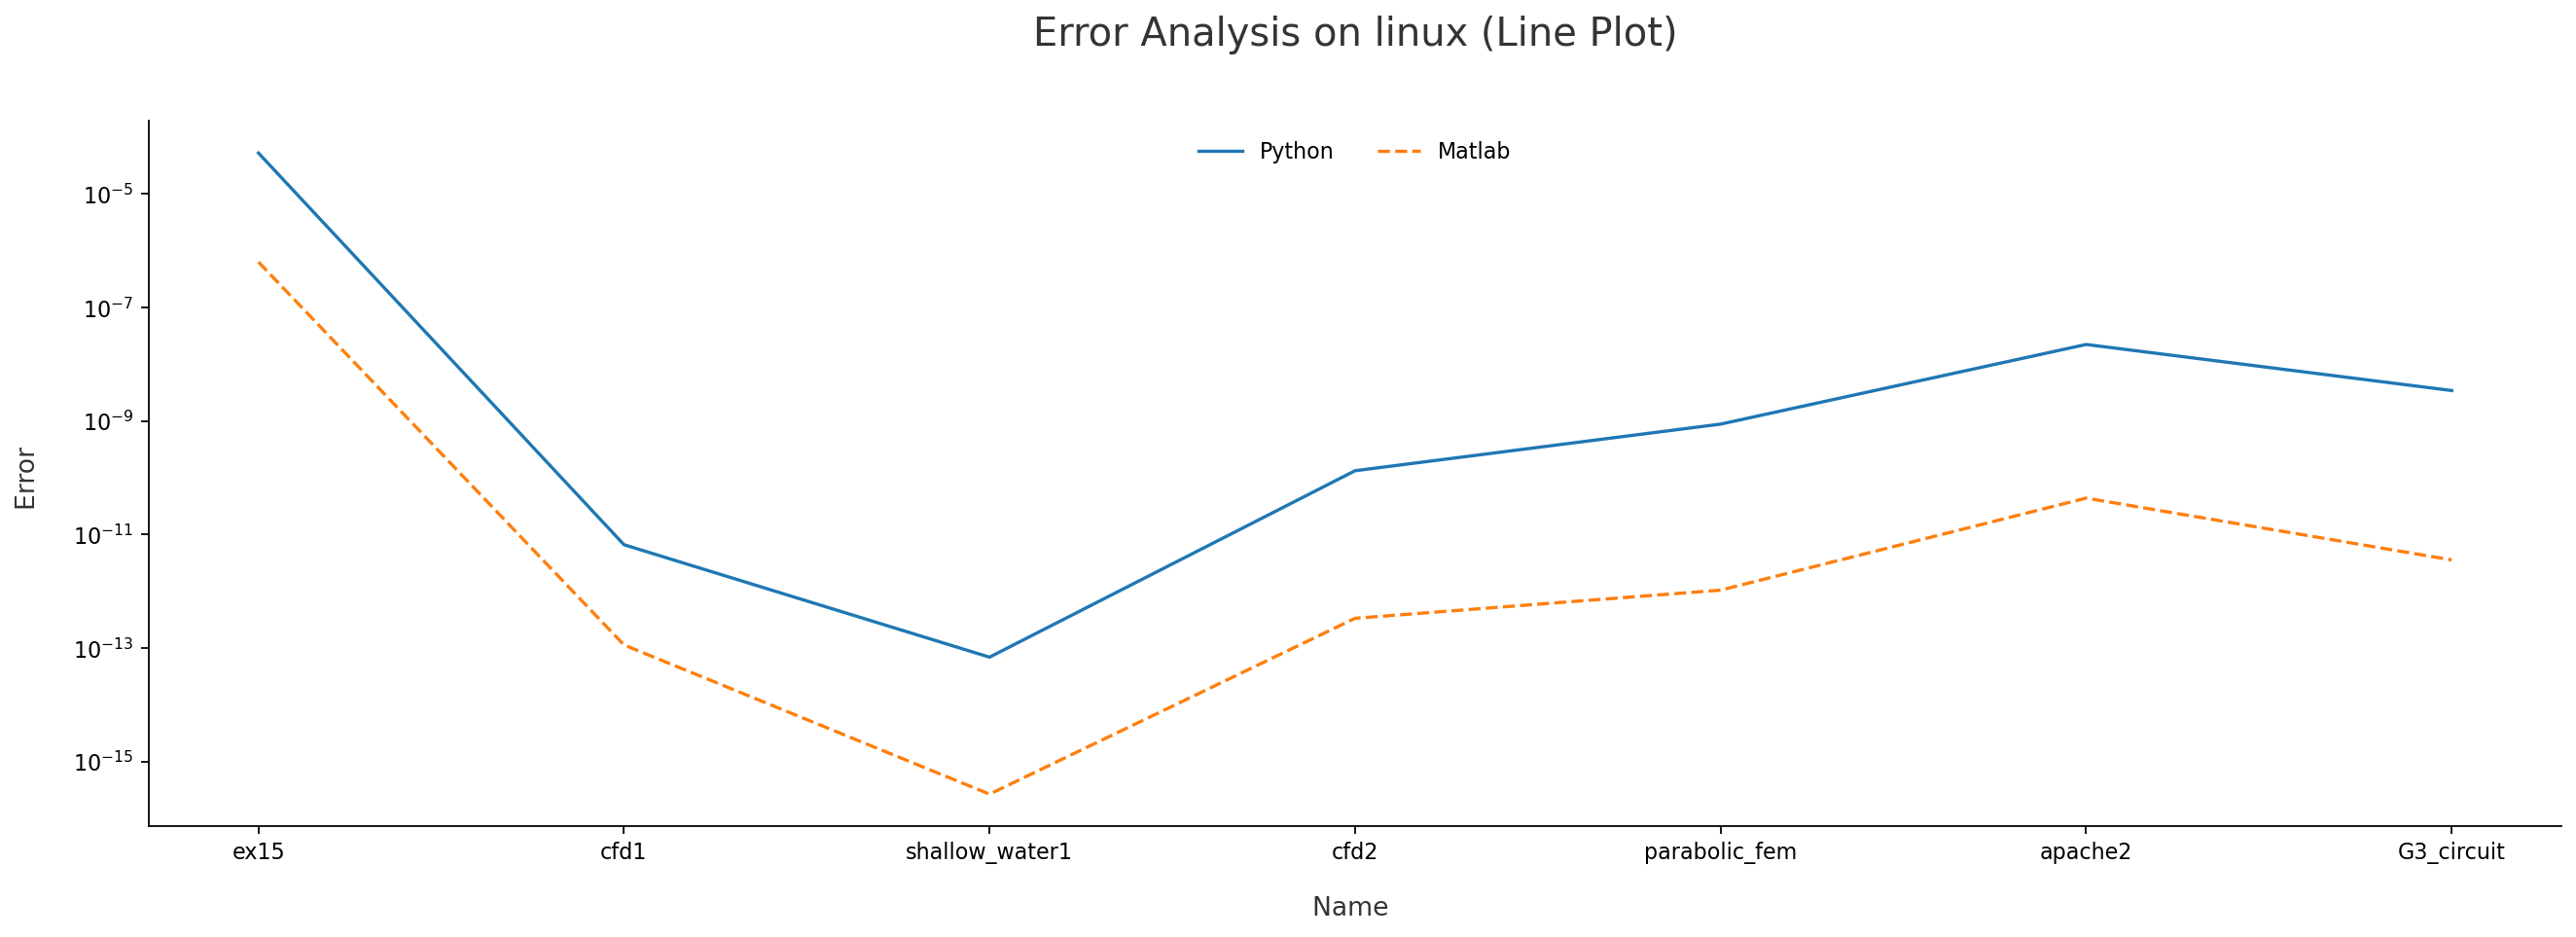

In [ ]:
plot(linux_py['Name'], linux_py['Error'], linux_mat['Error'], "Name", "Error", "Error Analysis on linux")


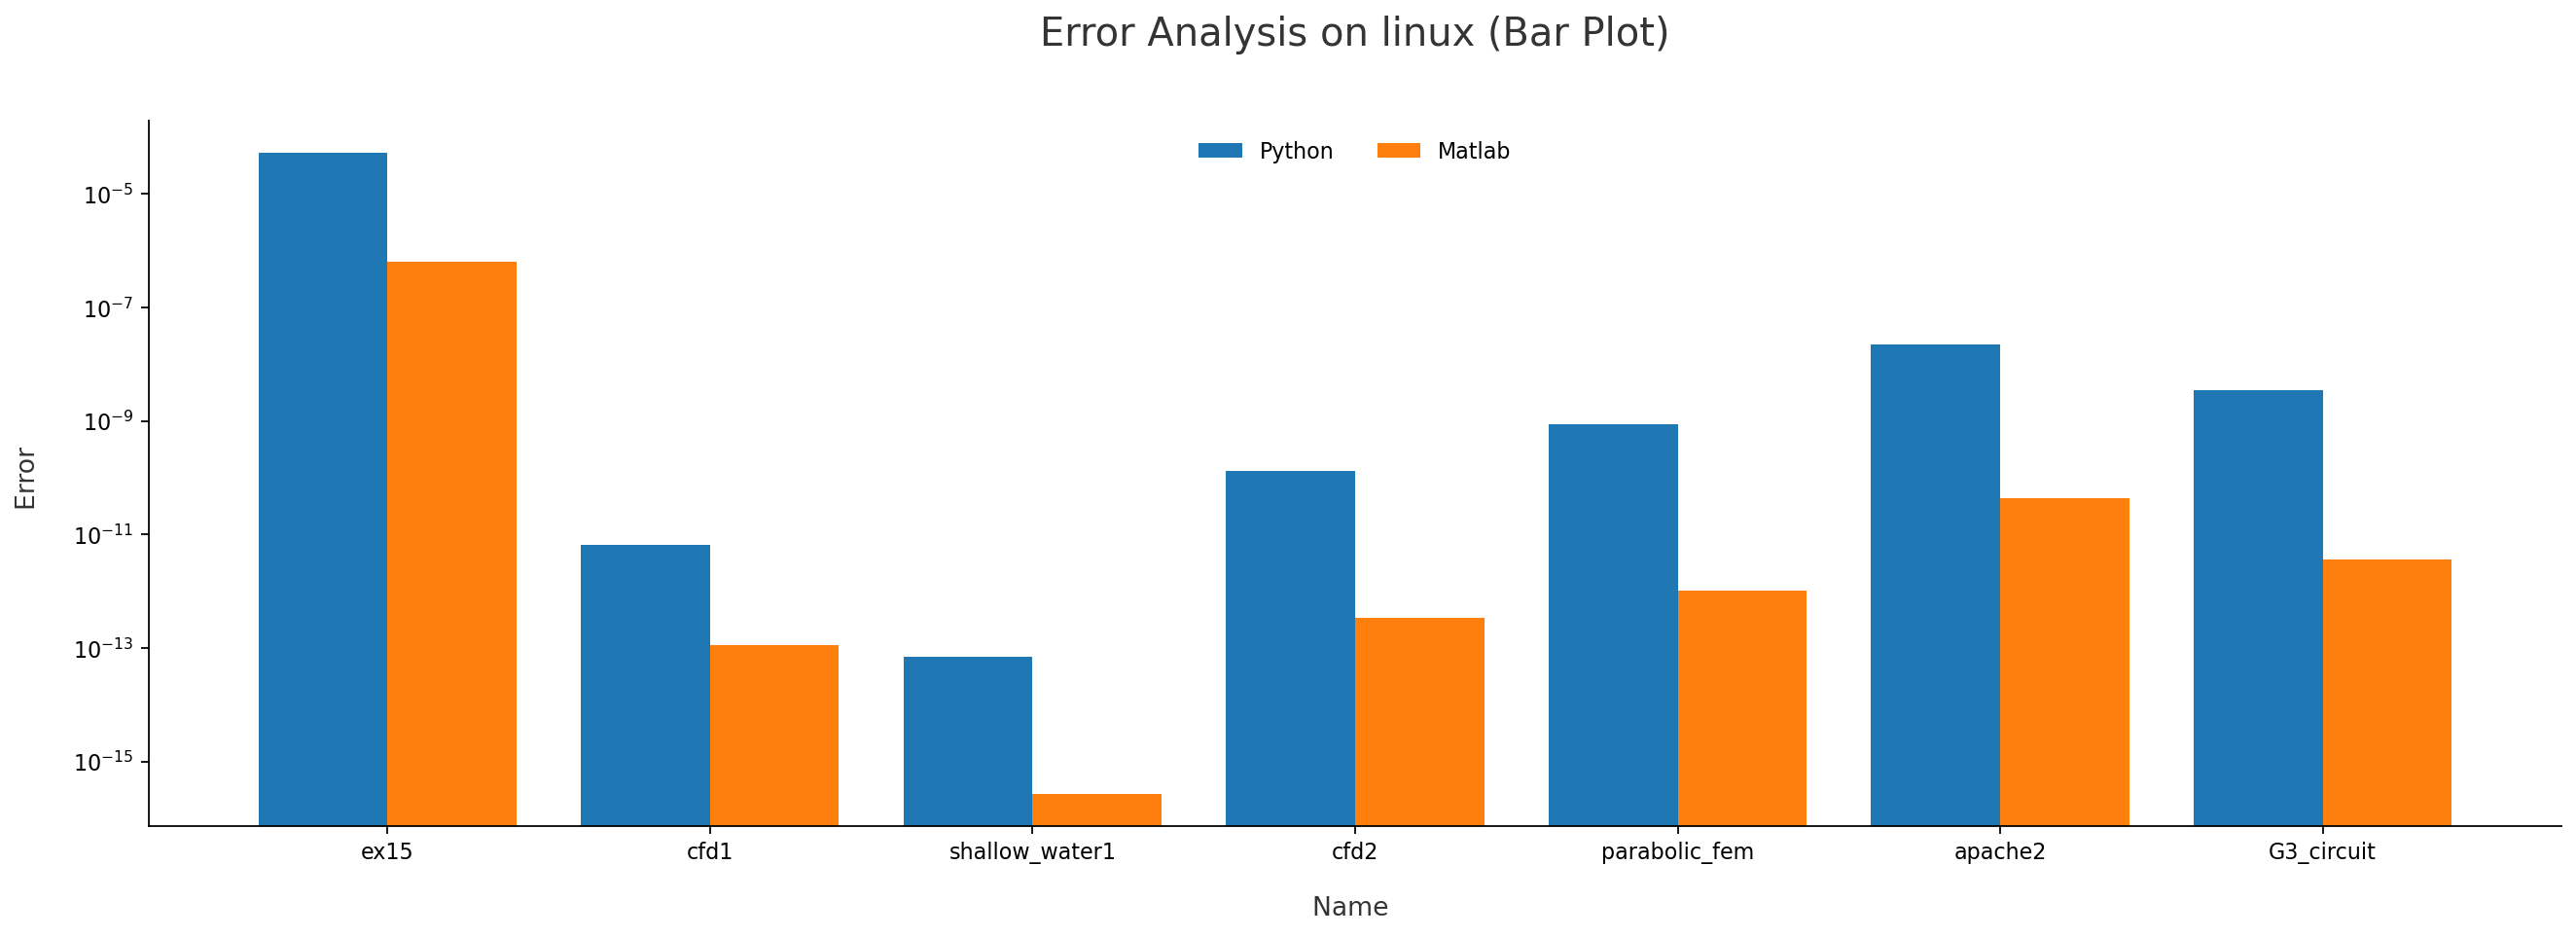

In [ ]:
bar_plot(linux_py['Name'], linux_py['Error'], linux_mat['Error'], "Name", "Error", "Error Analysis on linux")


### MEMORY

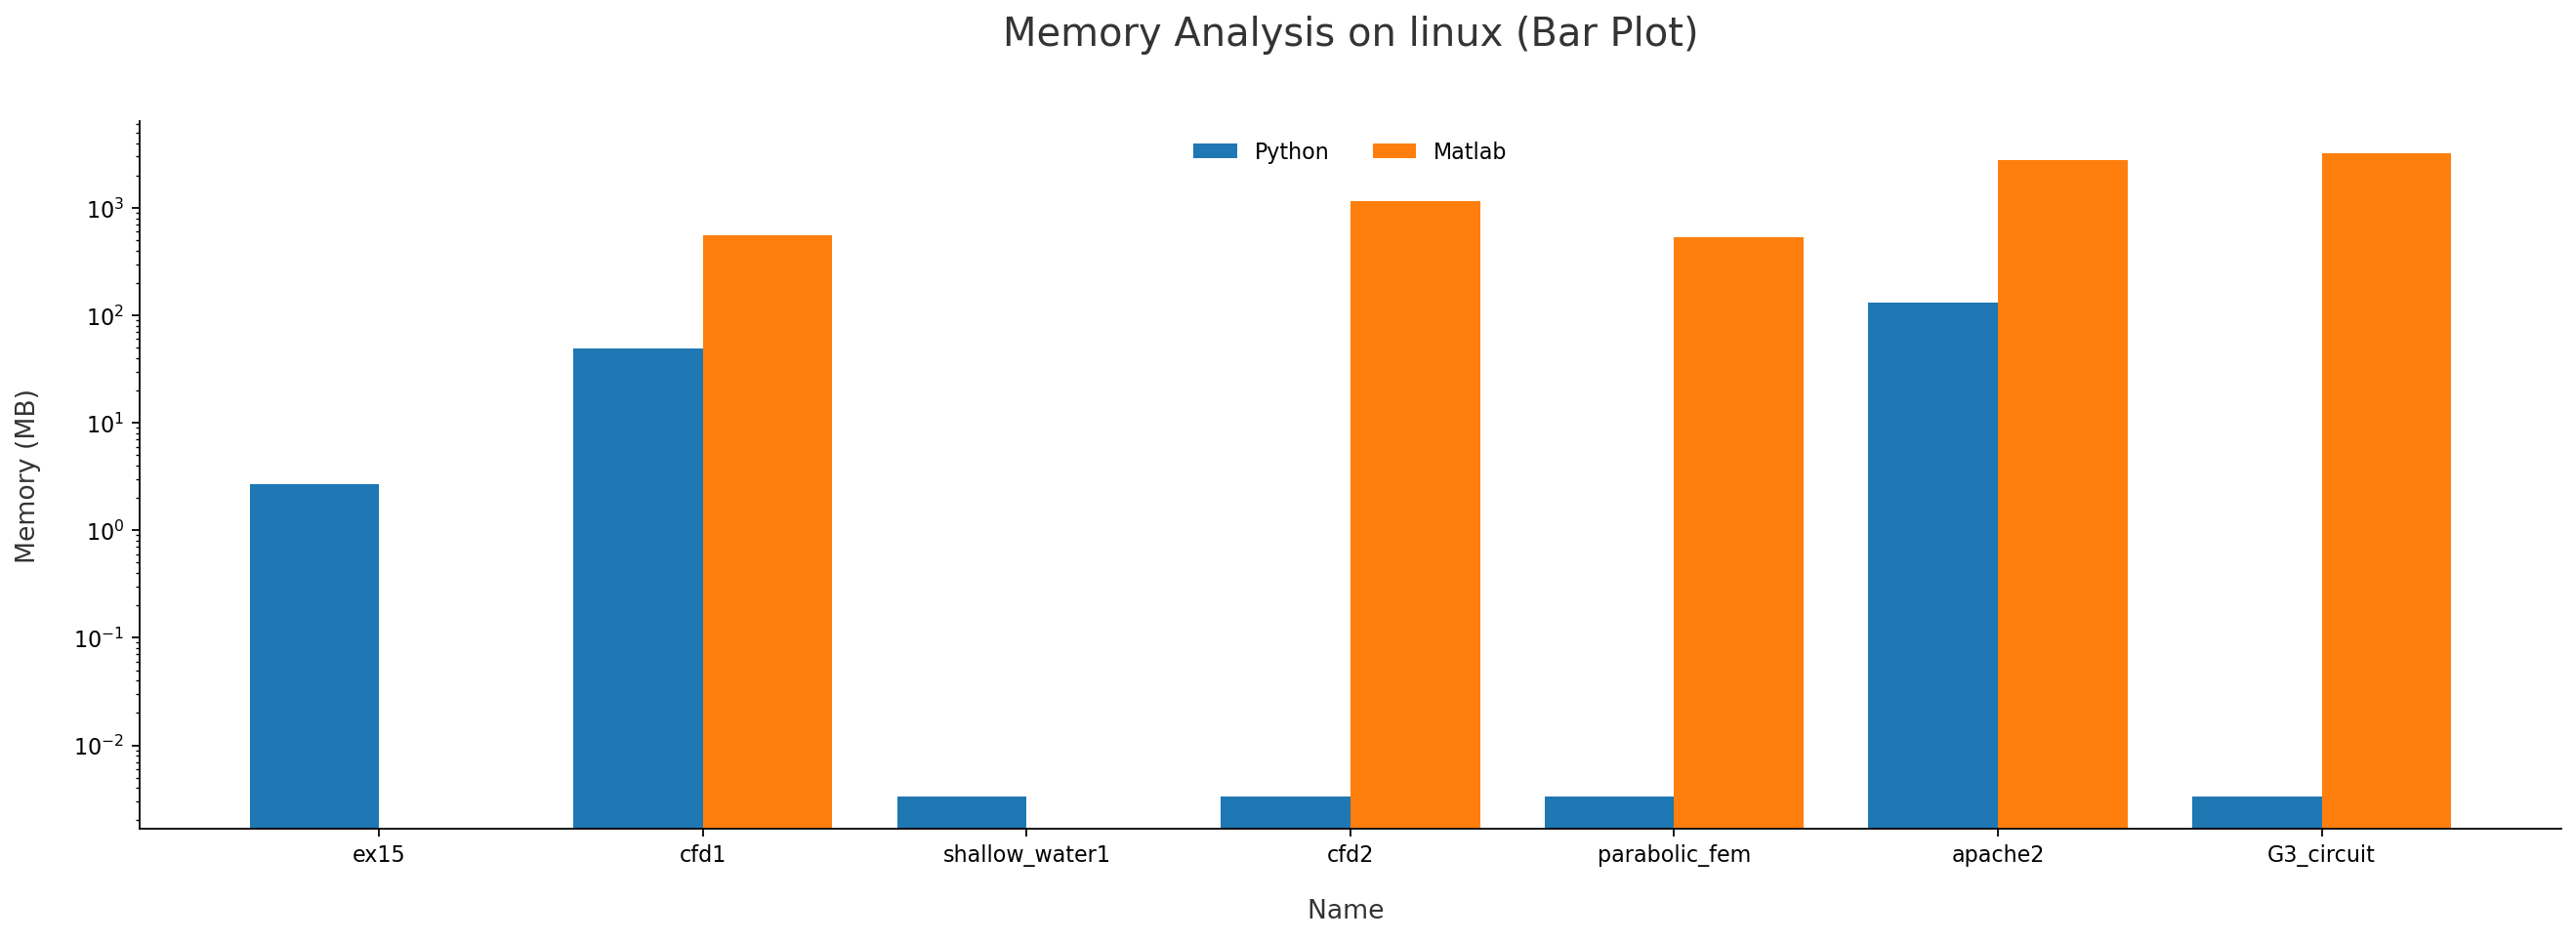

In [ ]:
bar_plot(linux_py['Name'], linux_py['Memory'], linux_mat['Memory'], "Name", "Memory", "Memory Analysis on linux", Y_LABEL="MB")

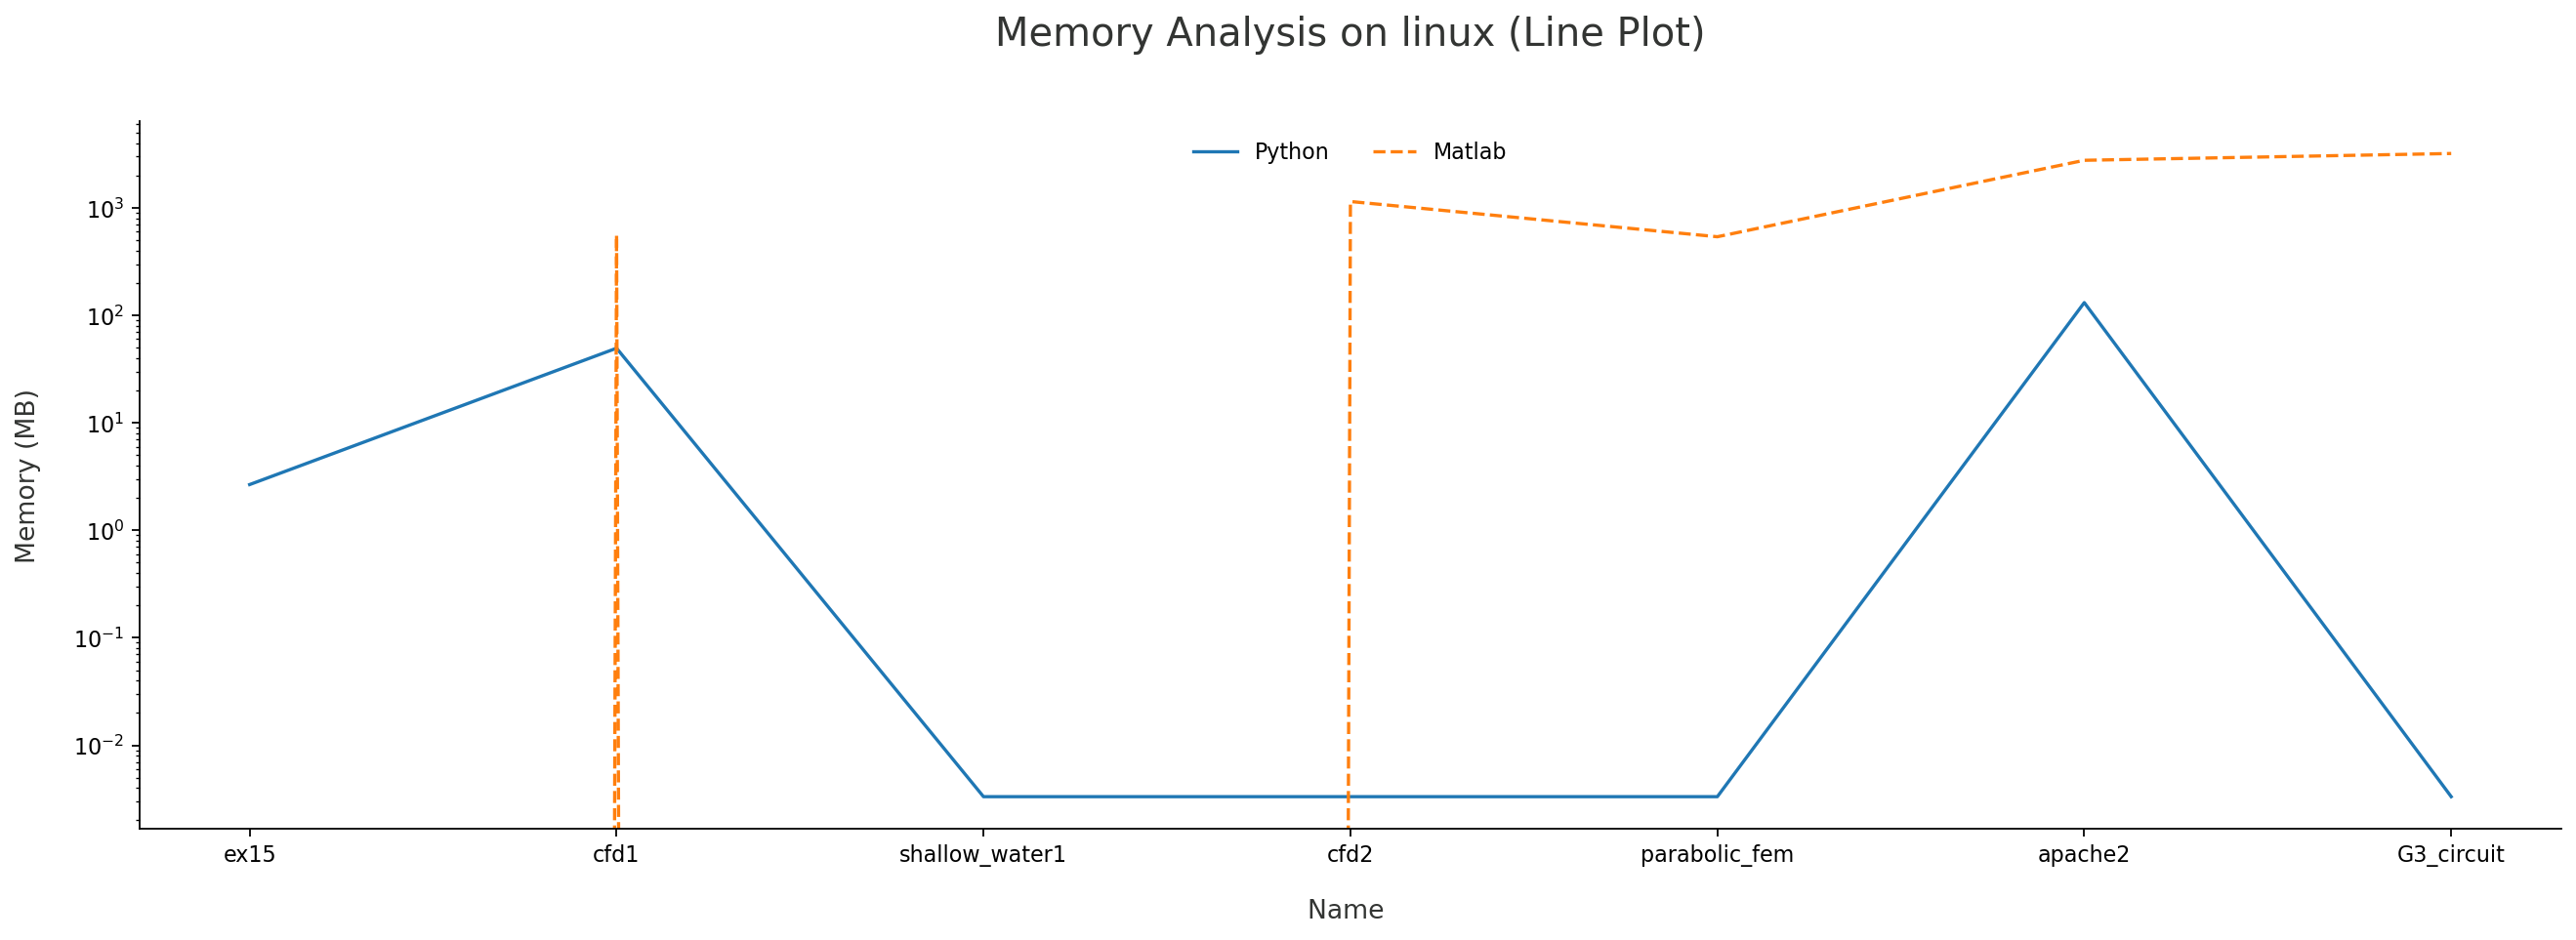

In [ ]:
plot(linux_py['Name'], linux_py['Memory'], linux_mat['Memory'], "Name", "Memory", "Memory Analysis on linux", Y_LABEL="MB")

### TIME

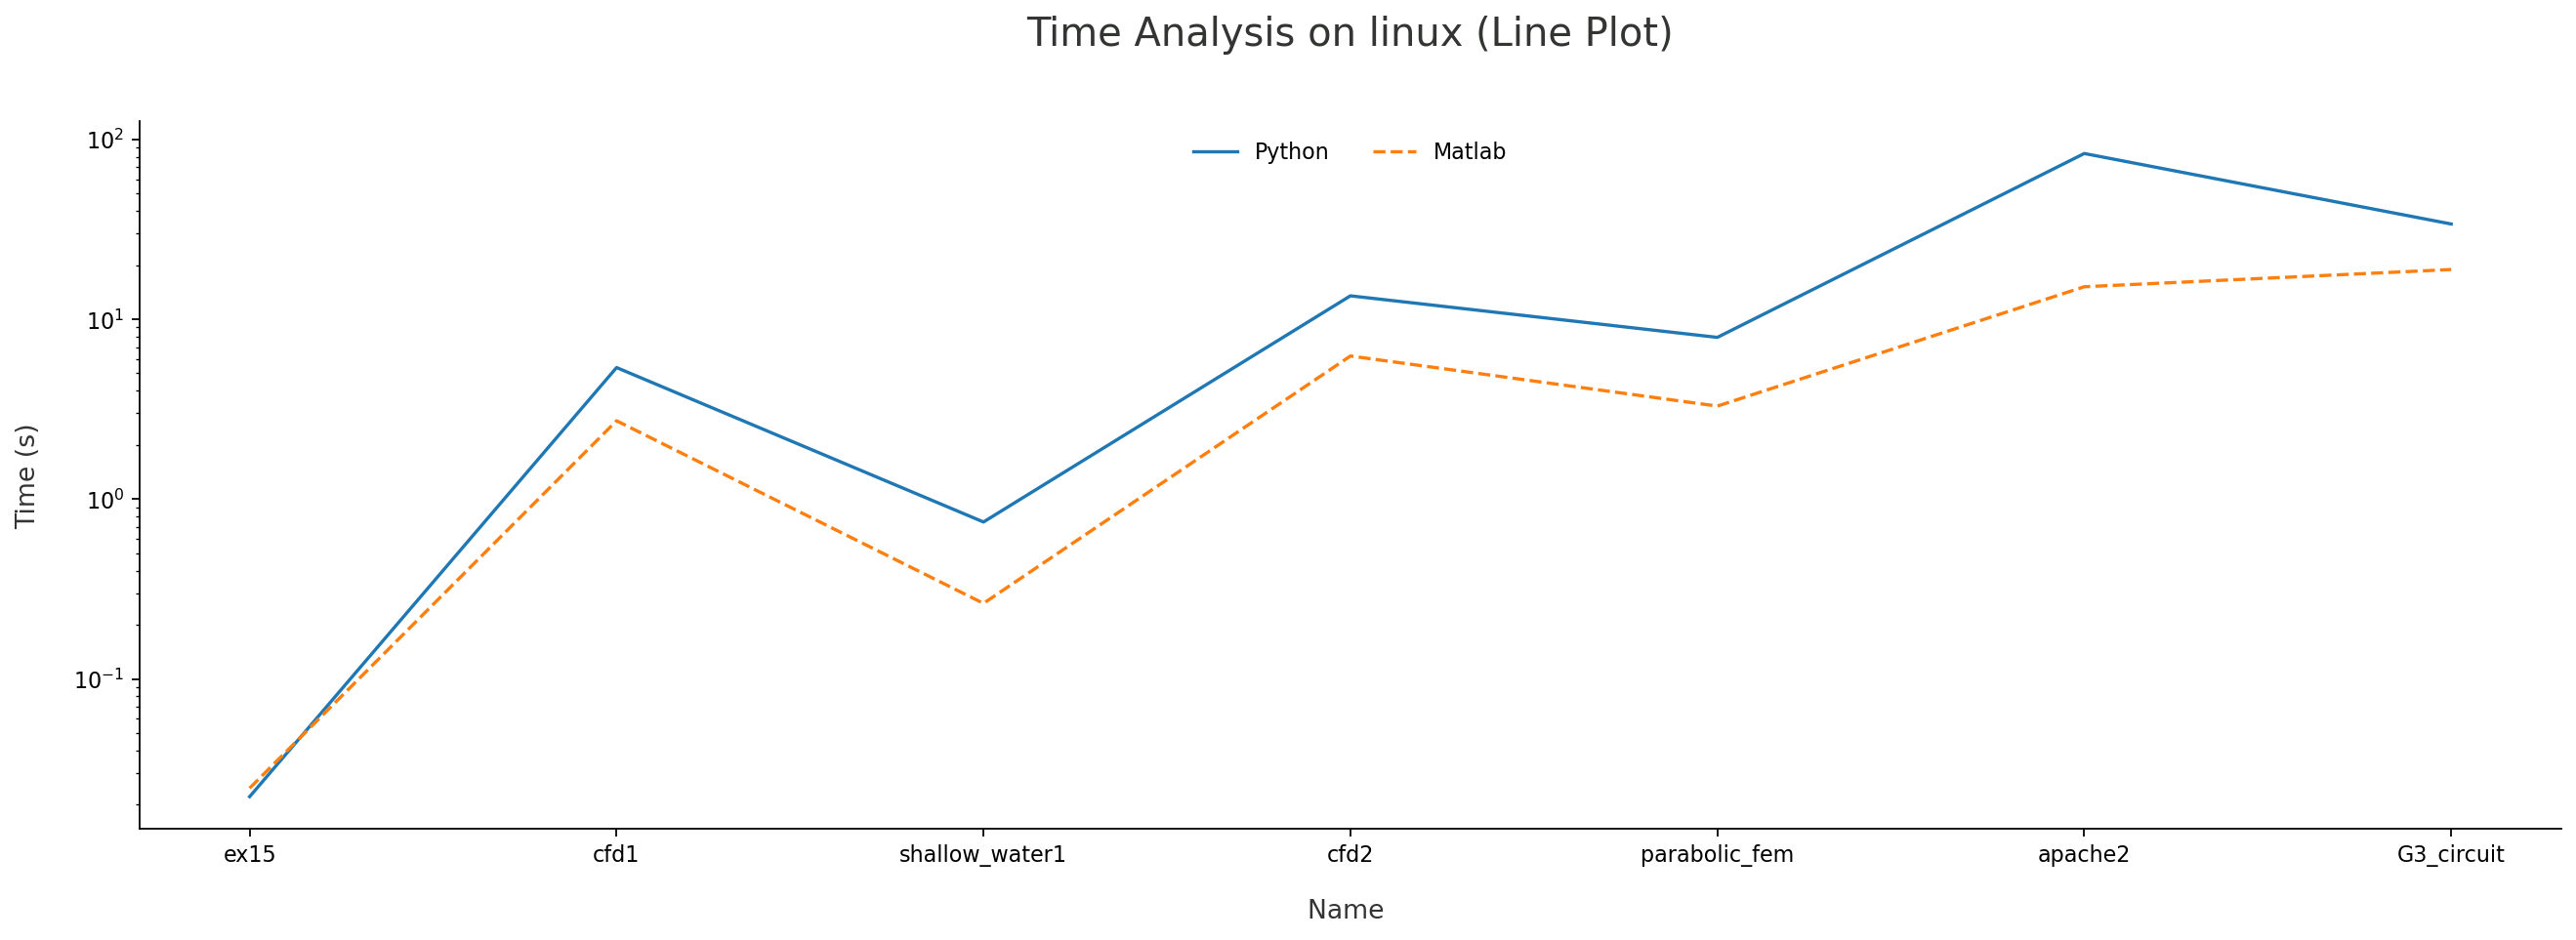

In [ ]:
plot(linux_py['Name'], linux_py['Time'], linux_mat['Time'], "Name", "Time","Time Analysis on linux", Y_LABEL="s")

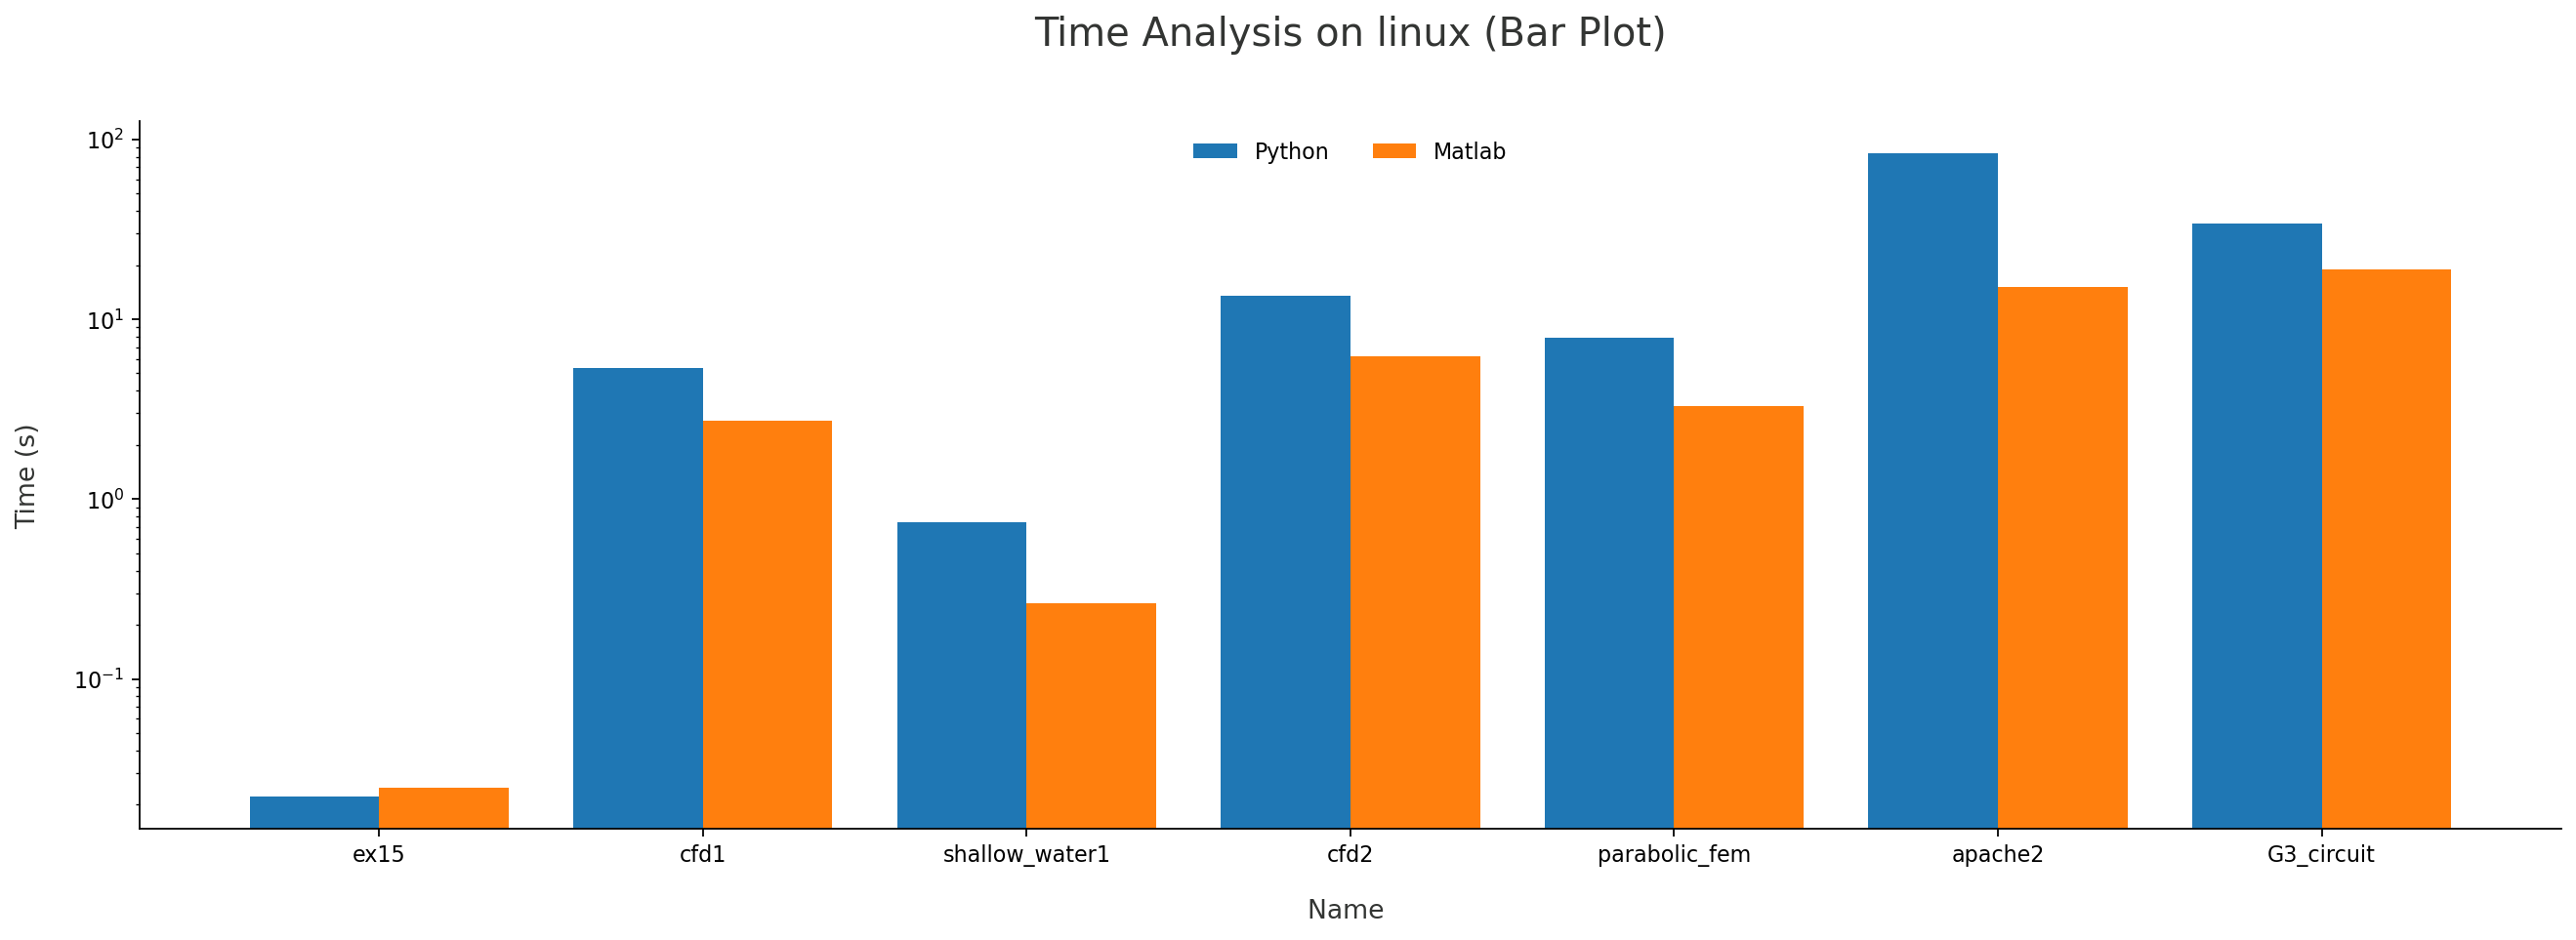

In [ ]:
bar_plot(linux_py['Name'], linux_py['Time'], linux_mat['Time'], "Name", "Time","Time Analysis on linux", Y_LABEL="s")